# Chapter 6 Decision Trees

In this chapter, starting on page 167 of "Hands-On Machine Learning with Sciket-Learn & TensorFlow", we'll look at how to train, visualise and make predictions with decision trees. 

Firslt, let's load the Iris data set via sklearn.datasets, and see the data and the labels. 

In [9]:
# 1st May 2020 and subsequently...

from sklearn.datasets import load_iris

iris = load_iris( )

print( iris[ "data" ] )
print( iris[ "target" ] )

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

[]

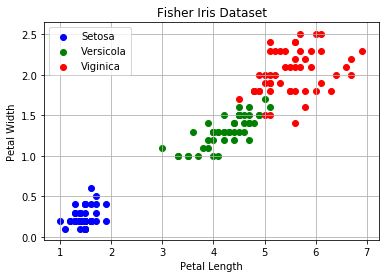

In [10]:
import matplotlib.pyplot as plt

# look at the data by species in a scatter plot
i = 0
j = len( iris[ "data" ] )
a, b, c, d, e, f = [ ], [ ], [ ], [ ], [ ], [ ]

for i in range( j ):
    if( iris[ "target" ][ i ] == 0 ):
        a.append( iris[ "data" ][ i, ( 2 ) ] ) # petal length
        b.append( iris[ "data" ][ i, ( 3 ) ] ) # petal width
    elif( iris[ "target" ][ i ] == 1 ):
        c.append( iris[ "data" ][ i, ( 2 ) ] )
        d.append( iris[ "data" ][ i, ( 3 ) ] )        
    else:
        e.append( iris[ "data" ][ i, ( 2 ) ] )
        f.append( iris[ "data" ][ i, ( 3 ) ] )

plt.scatter( a, b, color = "blue", label = "Setosa" ) # Iris Setosa
plt.scatter( c, d, color = "green", label = "Versicola" ) # Iris Versicola
plt.scatter( e, f, color = "red", label = "Viginica" ) # Iris Virginica

plt.xlabel( "Petal Length" )
plt.ylabel( "Petal Width" )
plt.title( "Fisher Iris Dataset" )
plt.legend( loc = 'upper left' )
plt.grid( )
plt.plot( )

So let's go with the petal length and petal width, and copy the values in a new array for training. 

In [11]:
x = iris.data[ :, 2: ] # petal length and width
print( x )
y = iris.target
print( y )

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]
 [1.5 0.2]
 [1.6 0.2]
 [1.4 0.1]
 [1.1 0.1]
 [1.2 0.2]
 [1.5 0.4]
 [1.3 0.4]
 [1.4 0.3]
 [1.7 0.3]
 [1.5 0.3]
 [1.7 0.2]
 [1.5 0.4]
 [1.  0.2]
 [1.7 0.5]
 [1.9 0.2]
 [1.6 0.2]
 [1.6 0.4]
 [1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [1.6 0.2]
 [1.5 0.4]
 [1.5 0.1]
 [1.4 0.2]
 [1.5 0.1]
 [1.2 0.2]
 [1.3 0.2]
 [1.5 0.1]
 [1.3 0.2]
 [1.5 0.2]
 [1.3 0.3]
 [1.3 0.3]
 [1.3 0.2]
 [1.6 0.6]
 [1.9 0.4]
 [1.4 0.3]
 [1.6 0.2]
 [1.4 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [4.7 1.4]
 [4.5 1.5]
 [4.9 1.5]
 [4.  1.3]
 [4.6 1.5]
 [4.5 1.3]
 [4.7 1.6]
 [3.3 1. ]
 [4.6 1.3]
 [3.9 1.4]
 [3.5 1. ]
 [4.2 1.5]
 [4.  1. ]
 [4.7 1.4]
 [3.6 1.3]
 [4.4 1.4]
 [4.5 1.5]
 [4.1 1. ]
 [4.5 1.5]
 [3.9 1.1]
 [4.8 1.8]
 [4.  1.3]
 [4.9 1.5]
 [4.7 1.2]
 [4.3 1.3]
 [4.4 1.4]
 [4.8 1.4]
 [5.  1.7]
 [4.5 1.5]
 [3.5 1. ]
 [3.8 1.1]
 [3.7 1. ]
 [3.9 1.2]
 [5.1 1.6]
 [4.5 1.5]
 [4.5 1.6]
 [4.7 1.5]
 [4.4 1.3]
 [4.1 1.3]
 [4.  1.3]
 [4.4 1.2]

Now let's train a DecisionTreeClassifier (with a max depth of 2) on the x and y data. (The greater the depth of the tree, the more it tends to overfit. Keeping the max_depth shallow(ish) helps to keep the tree generalisable (regularization)). 

In [12]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier( max_depth = 2 )
tree_clf.fit( x, y )
print( tree_clf )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


You can visualise the trained Decision Tree by first using the export_graphviz( ) method, to output a graph definition file called "iris_tree.dot".  

In [13]:
from sklearn.tree import export_graphviz

export_graphviz( 
        tree_clf,
        out_file = "iris_tree.dot", 
        feature_names = iris.feature_names[ 2: ],
        class_names = iris.target_names,
        rounded = True,
        filled = True
    )


Have a look at the iris_tree.png file. Each node's Gini attribute measure its 'impurity'. A node is 'pure' os gini = 0. E.g. all Iris setosa training instances belong to the same class, so gini 0. However, Iris versicolor has 54 training instances, although only 49 belong to the this class, 5 belong to Iris virginica. Gini here is 0.168. The equation for calculating gini is on page 169.

A Decision Tree can also predict the probability that an instance belongs to a class. In this example, 0% for Setosa (0/54), 90.7% for Versicola (49/54), 9.3% for Virginica (5/54). 

In [15]:
tree_clf.predict_proba( [ [ 5.0, 1.5  ] ] )

array([[0.        , 0.90740741, 0.09259259]])

If the Decision Tree is asked to predict the class, it picks the class with the highest probability. 

In [16]:
tree_clf.predict( [ [ 5.0, 1.5 ] ] )

array([1])